In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
df = pd.read_csv(r'C:\Users\UMER COMPUTERS\Desktop\DataRead\used cars.csv')
df.head()

,addref,city,assembly,body,make,model,year,engine,transmission,fuel,color,registered,mileage,price
0,7943732,Peshawar,NaN,Sedan,Toyota,Corolla,2013.0,1300.0,Manual,Petrol,Silver Metallic,Lahore,145000,2870000.0
1,7730314,Lahore,NaN,Sedan,Honda,City,2000.0,1300.0,Manual,Petrol,Blue,Lahore,230000,995000.0
2,7943737,Lahore,NaN,Sedan,Toyota,Yaris,2021.0,1300.0,Manual,Petrol,Super White,Punjab,60500,3585000.0
3,7943733,Lahore,NaN,Hatchback,Suzuki,Swift,2017.0,1300.0,Manual,Petrol,Grey,Islamabad,87000,2250000.0
4,7923484,Lahore,NaN,Sedan,Honda,Civic,2017.0,1800.0,Automatic,Petrol,Grey,Lahore,86000,4850000.0


# Data Wrangling




Data wrangling, also known as data cleaning, data munging, or data remediation, is the process of transforming and mapping data from one "raw" data form into another format with the intent of making it more appropriate and valuable for a variety of downstream purposes such as analytics.

Data wrangling is an essential part of the data science workflow, as it helps to ensure that the data is accurate, complete, and consistent. This is important because the quality of the data has a direct impact on the quality of the analysis and insights that can be generated from it.

## data Exploration

In [4]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77878 entries, 0 to 77877
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   addref        77878 non-null  int64  
 1   city          77878 non-null  object 
 2   assembly      24189 non-null  object 
 3   body          68974 non-null  object 
 4   make          77878 non-null  object 
 5   model         77878 non-null  object 
 6   year          73099 non-null  float64
 7   engine        77875 non-null  float64
 8   transmission  77878 non-null  object 
 9   fuel          76972 non-null  object 
 10  color         76398 non-null  object 
 11  registered    77878 non-null  object 
 12  mileage       77878 non-null  int64  
 13  price         77295 non-null  float64
dtypes: float64(3), int64(2), object(9)
memory usage: 8.3+ MB


,addref,year,engine,mileage,price
count,7.787800e+04,73099.000000,77875.000000,77878.000000,7.729500e+04
mean,7.809878e+06,2012.812610,1408.072550,91109.192750,3.883232e+06
std,2.599523e+05,7.516685,704.459947,89275.336173,5.759480e+06
min,2.748970e+05,1990.000000,3.000000,1.000000,1.100000e+05
25%,7.805760e+06,2007.000000,1000.000000,34000.000000,1.450000e+06
50%,7.865805e+06,2015.000000,1300.000000,80000.000000,2.700000e+06
75%,7.910334e+06,2019.000000,1600.000000,123456.000000,4.500000e+06
max,7.943741e+06,2022.000000,15000.000000,1000000.000000,5.290000e+08


In [5]:
## drop duplicates
df.drop_duplicates(inplace=True)

In [6]:
## looking for null values
df.isnull().sum()

addref              0
city                0
assembly        53689
body             8904
make                0
model               0
year             4779
engine              3
transmission        0
fuel              906
color            1480
registered          0
mileage             0
price             583
dtype: int64

In [7]:
## droping columns with high null values count
colum_drop = ['addref','assembly','body']
df = df.drop(columns=colum_drop)

In [8]:
## filling year null value with interpolation method
df['year'] = df['year'].interpolate(method='linear')

In [9]:
##droping rows with missing values
df= df.dropna()

In [10]:
## checking the shape of data
df.shape

(74979, 11)

-0.8404551870382014
0.10445630160203079
count    74979.000000
mean      2012.892857
std          7.361963
min       1990.000000
25%       2008.000000
50%       2015.000000
75%       2019.000000
max       2022.000000
Name: year, dtype: float64


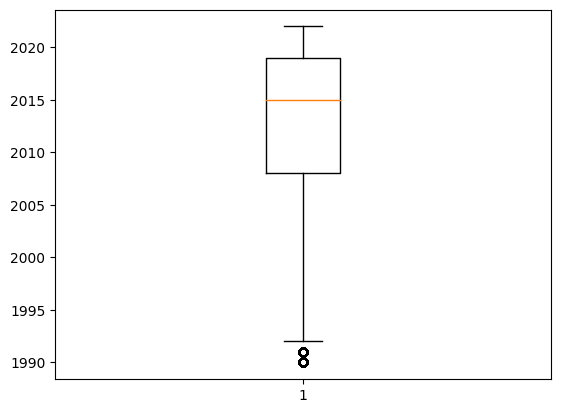

3.311316593123478
31.26142664015866
count    74979.000000
mean      1408.341202
std        694.973161
min        100.000000
25%       1000.000000
50%       1300.000000
75%       1600.000000
max      15000.000000
Name: engine, dtype: float64


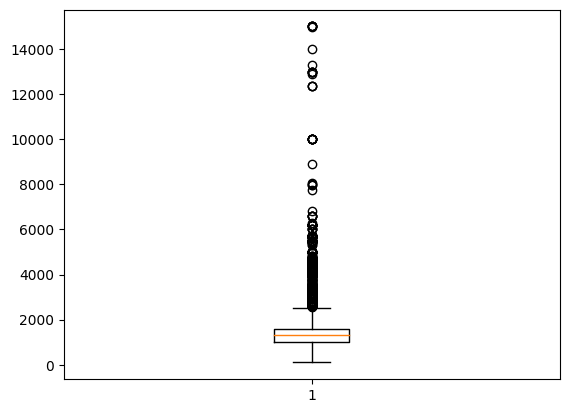

4.174167700312489
32.92557310188749
count      74979.000000
mean       90940.262967
std        88344.566773
min            1.000000
25%        34112.500000
50%        80000.000000
75%       123456.000000
max      1000000.000000
Name: mileage, dtype: float64


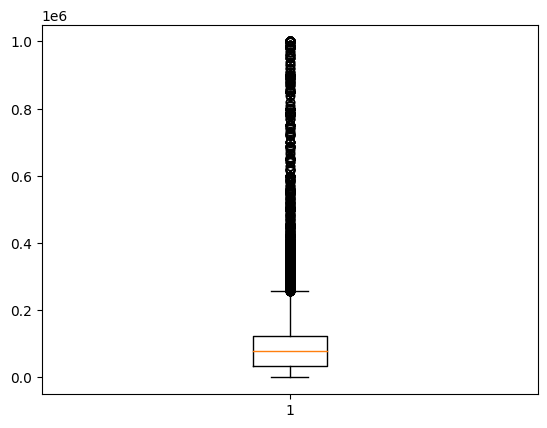

19.07136136595998
1210.9646504050427
count    7.497900e+04
mean     3.864049e+06
std      5.514709e+06
min      1.100000e+05
25%      1.480000e+06
50%      2.725000e+06
75%      4.550000e+06
max      5.290000e+08
Name: price, dtype: float64


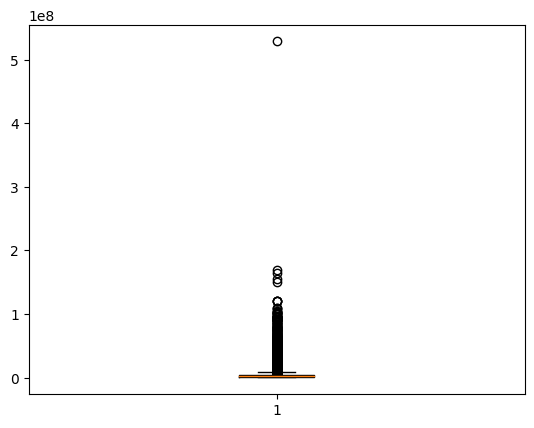

In [10]:
### outliers detection
for i in df.select_dtypes(include='number'):
    print(df[i].skew())
    print(df[i].kurtosis())
    print(df[i].describe())
    plt.boxplot(df[i])
    plt.show()


Text(0, 0.5, 'values')

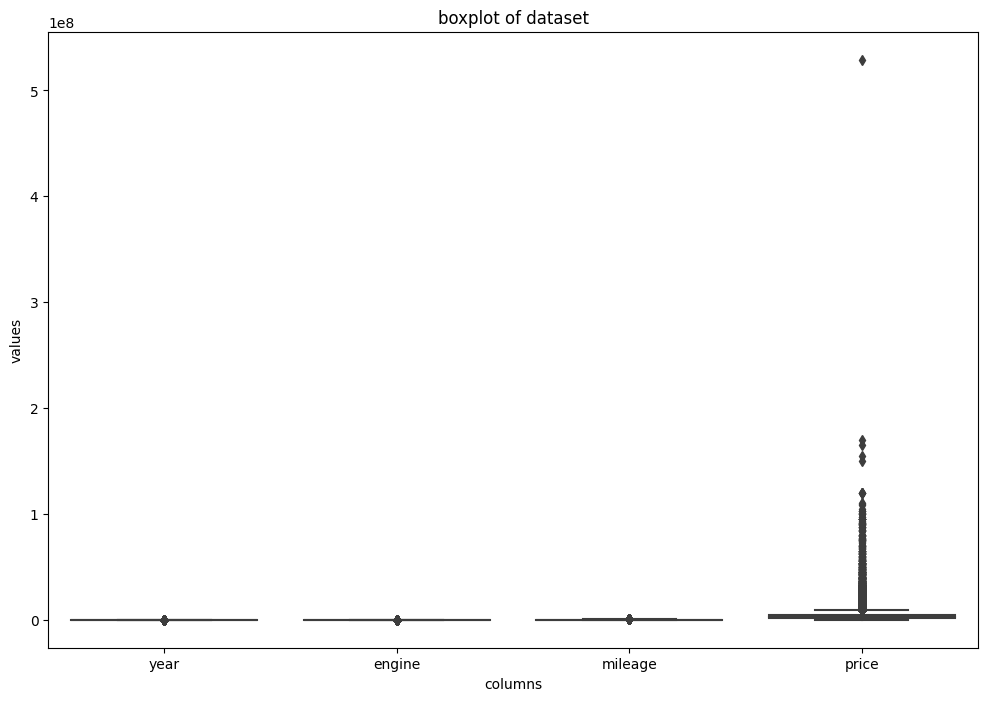

In [11]:
numerical_cols  =df.select_dtypes(include='number')
plt.figure(figsize=(12,8))
sns.boxplot(data=numerical_cols)
plt.title('boxplot of dataset')
plt.xlabel('columns')
plt.ylabel('values')

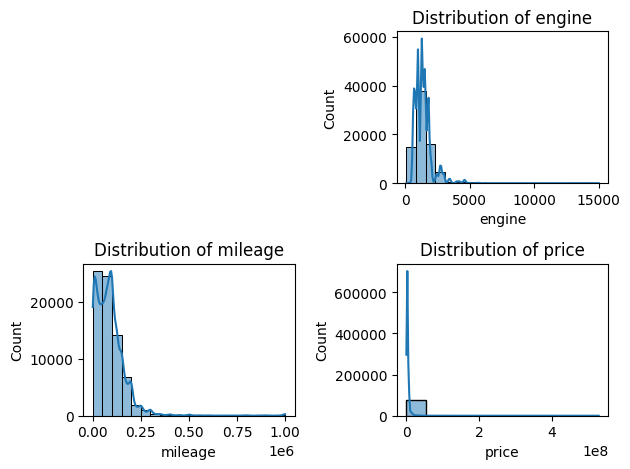

In [12]:
## see distribution of data

plt.subplot(2, 2, 2)
sns.histplot(data=df, x='engine', bins=20, kde=True)
plt.title('Distribution of engine')


plt.subplot(2, 2, 3)
sns.histplot(data=df, x='mileage', bins=20, kde=True)
plt.title('Distribution of mileage')


plt.subplot(2, 2, 4)
sns.histplot(data=df, x='price', bins=10, kde=True)
plt.title('Distribution of price')

plt.tight_layout()
plt.show()

In [13]:
# dealing with  outliers  i


def find_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (series < lower_bound) | (series > upper_bound)
    return outliers

def cap_outliers_in_dataframe(df):
    capped_df = df.copy()

    for column in capped_df.columns:
        if np.issubdtype(capped_df[column].dtype, np.number):  # Check if the column contains numeric data
            outliers = find_outliers_iqr(capped_df[column])

            # Cap the outliers by replacing them with lower/upper bounds
            Q1 = capped_df[column].quantile(0.25)
            Q3 = capped_df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            capped_df[column] = np.where(outliers, np.clip(capped_df[column], lower_bound, upper_bound), capped_df[column])

    return capped_df

capped_df = cap_outliers_in_dataframe(df)

# Print the DataFrame with capped values
print(capped_df)

             city    make    model    year  engine transmission    fuel  \
0        Peshawar  Toyota  Corolla  2013.0  1300.0       Manual  Petrol   
1          Lahore   Honda     City  2000.0  1300.0       Manual  Petrol   
2          Lahore  Toyota    Yaris  2021.0  1300.0       Manual  Petrol   
3          Lahore  Suzuki    Swift  2017.0  1300.0       Manual  Petrol   
4          Lahore   Honda    Civic  2017.0  1800.0    Automatic  Petrol   
...           ...     ...      ...     ...     ...          ...     ...   
77873       Daska   Honda    Civic  2019.0  1800.0    Automatic  Petrol   
77874  Abbottabad  Suzuki     Alto  2015.0   660.0    Automatic  Petrol   
77875  Faisalabad      MG       HS  2021.0  1490.0    Automatic  Petrol   
77876      Quetta  Suzuki   Baleno  2005.0  1300.0       Manual  Petrol   
77877       Mandi  Toyota  Corolla  1998.0  1600.0    Automatic  Petrol   

                 color     registered   mileage      price  
0      Silver Metallic         Lahore 

In [14]:
capped_df

,city,make,model,year,engine,transmission,fuel,color,registered,mileage,price
0,Peshawar,Toyota,Corolla,2013.0,1300.0,Manual,Petrol,Silver Metallic,Lahore,145000.0,2870000.0
1,Lahore,Honda,City,2000.0,1300.0,Manual,Petrol,Blue,Lahore,230000.0,995000.0
2,Lahore,Toyota,Yaris,2021.0,1300.0,Manual,Petrol,Super White,Punjab,60500.0,3585000.0
3,Lahore,Suzuki,Swift,2017.0,1300.0,Manual,Petrol,Grey,Islamabad,87000.0,2250000.0
4,Lahore,Honda,Civic,2017.0,1800.0,Automatic,Petrol,Grey,Lahore,86000.0,4850000.0
...,...,...,...,...,...,...,...,...,...,...,...
77873,Daska,Honda,Civic,2019.0,1800.0,Automatic,Petrol,Taffeta White,Islamabad,58000.0,5590000.0
77874,Abbottabad,Suzuki,Alto,2015.0,660.0,Automatic,Petrol,Brown,Islamabad,65000.0,2420000.0
77875,Faisalabad,MG,HS,2021.0,1490.0,Automatic,Petrol,Arctic White,Un-Registered,5000.0,7500000.0
77876,Quetta,Suzuki,Baleno,2005.0,1300.0,Manual,Petrol,Silver,Lahore,19000.0,1250000.0


Text(0, 0.5, 'values')

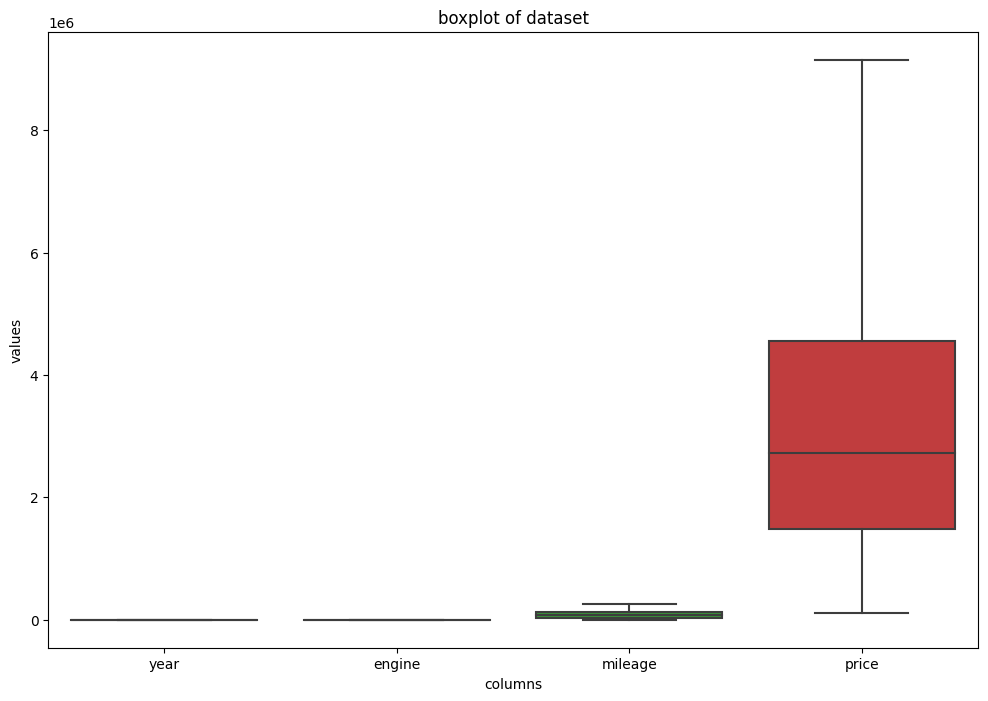

In [15]:
## checking for oultliers after cap
numerical_cols  =capped_df.select_dtypes(include='number')
plt.figure(figsize=(12,8))
sns.boxplot(data=numerical_cols)
plt.title('boxplot of dataset')
plt.xlabel('columns')
plt.ylabel('values')

In [16]:
capped_df.dtypes

city             object
make             object
model            object
year            float64
engine          float64
transmission     object
fuel             object
color            object
registered       object
mileage         float64
price           float64
dtype: object

In [17]:
## convert to int
float_columns = ['year','engine']
capped_df[float_columns] = capped_df[float_columns].astype('int')

In [18]:
capped_df.head()

,city,make,model,year,engine,transmission,fuel,color,registered,mileage,price
0,Peshawar,Toyota,Corolla,2013,1300,Manual,Petrol,Silver Metallic,Lahore,145000.0,2870000.0
1,Lahore,Honda,City,2000,1300,Manual,Petrol,Blue,Lahore,230000.0,995000.0
2,Lahore,Toyota,Yaris,2021,1300,Manual,Petrol,Super White,Punjab,60500.0,3585000.0
3,Lahore,Suzuki,Swift,2017,1300,Manual,Petrol,Grey,Islamabad,87000.0,2250000.0
4,Lahore,Honda,Civic,2017,1800,Automatic,Petrol,Grey,Lahore,86000.0,4850000.0


### Feature Engineering

In [19]:
## calculating age of the car
reference_year = 2023
capped_df['age_of_vehicle'] = reference_year - capped_df['year']

In [20]:
## calculate the milage per year
capped_df['millage_per_year'] = capped_df['mileage'] / capped_df['age_of_vehicle']

### data transformation

In [80]:
# from sklearn.preprocessing import MinMaxScaler
# numerical_columns = capped_df.select_dtypes(include='number').columns
# scaler  =MinMaxScaler()
# normalized_df[numerical_columns] = scaler.fit_transform(cappe`d_df[numerical_columns])


NameError: name 'normalized_df' is not defined

In [21]:
capped_df

,city,make,model,year,engine,transmission,fuel,color,registered,mileage,price,age_of_vehicle,millage_per_year
0,Peshawar,Toyota,Corolla,2013,1300,Manual,Petrol,Silver Metallic,Lahore,145000.0,2870000.0,10,14500.000000
1,Lahore,Honda,City,2000,1300,Manual,Petrol,Blue,Lahore,230000.0,995000.0,23,10000.000000
2,Lahore,Toyota,Yaris,2021,1300,Manual,Petrol,Super White,Punjab,60500.0,3585000.0,2,30250.000000
3,Lahore,Suzuki,Swift,2017,1300,Manual,Petrol,Grey,Islamabad,87000.0,2250000.0,6,14500.000000
4,Lahore,Honda,Civic,2017,1800,Automatic,Petrol,Grey,Lahore,86000.0,4850000.0,6,14333.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77873,Daska,Honda,Civic,2019,1800,Automatic,Petrol,Taffeta White,Islamabad,58000.0,5590000.0,4,14500.000000
77874,Abbottabad,Suzuki,Alto,2015,660,Automatic,Petrol,Brown,Islamabad,65000.0,2420000.0,8,8125.000000
77875,Faisalabad,MG,HS,2021,1490,Automatic,Petrol,Arctic White,Un-Registered,5000.0,7500000.0,2,2500.000000
77876,Quetta,Suzuki,Baleno,2005,1300,Manual,Petrol,Silver,Lahore,19000.0,1250000.0,18,1055.555556


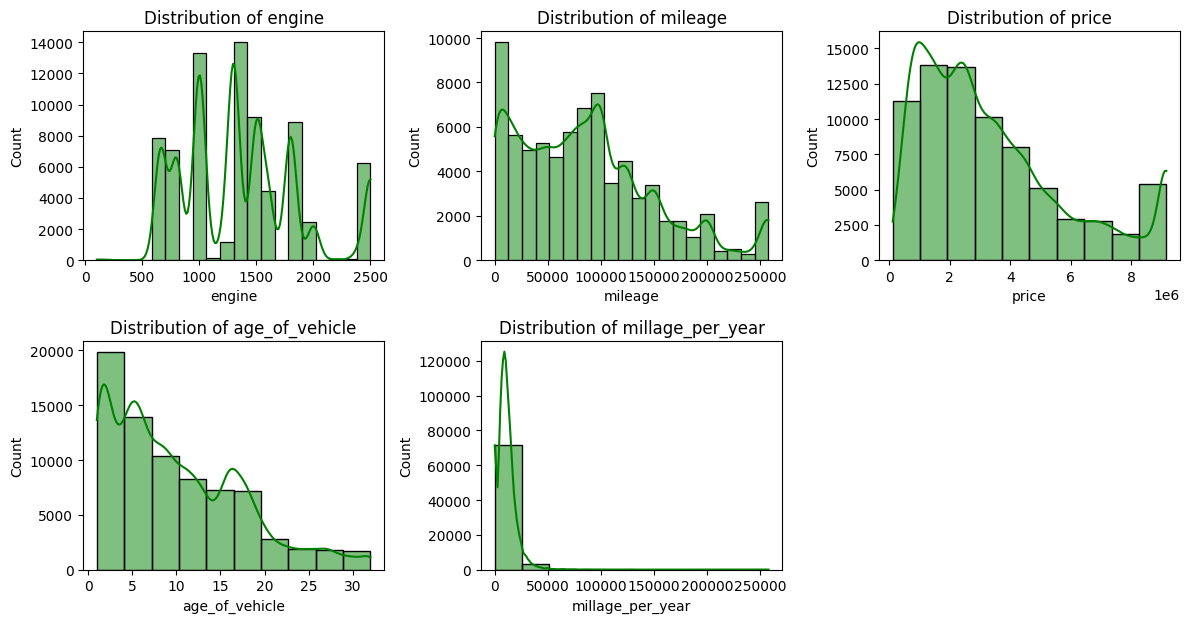

In [22]:
## see distribution of data
plt.figure(figsize=(12,9))

plt.subplot(3, 3, 1)
sns.histplot(data=capped_df, x='engine', bins=20, kde=True,color='green')
plt.title('Distribution of engine')


plt.subplot(3, 3, 2)
sns.histplot(data=capped_df, x='mileage', bins=20, kde=True,color='green')
plt.title('Distribution of mileage')


plt.subplot(3, 3, 3)
sns.histplot(data=capped_df, x='price', bins=10, kde=True,color='green')
plt.title('Distribution of price')

plt.subplot(3, 3, 4)
sns.histplot(data=capped_df, x='age_of_vehicle', bins=10, kde=True,color='green')
plt.title('Distribution of age_of_vehicle')

plt.subplot(3, 3, 5)
sns.histplot(data=capped_df, x='millage_per_year', bins=10, kde=True,color='green')
plt.title('Distribution of millage_per_year')


plt.tight_layout()
plt.show()

## Data analysis

In [23]:
capped_df.columns

Index(['city', 'make', 'model', 'year', 'engine', 'transmission', 'fuel',
       'color', 'registered', 'mileage', 'price', 'age_of_vehicle',
       'millage_per_year'],
      dtype='object')

In [24]:
## How is the distribution of vehicles by 'make' and 'model' in the dataset?
make_distribution = capped_df['make'].value_counts()

model_distribution =capped_df['model'].value_counts()

print("Distribution of vehicles by 'make':")
print(make_distribution.head(5))

print("Distribution of vehicles by 'model':")
print(model_distribution.head(5))


Distribution of vehicles by 'make':
make
Toyota      23893
Suzuki      21606
Honda       16010
Daihatsu     2999
KIA          1705
Name: count, dtype: int64
Distribution of vehicles by 'model':
model
Corolla    12446
Civic       8057
City        5184
Mehran      4419
Cultus      4353
Name: count, dtype: int64


In [25]:
#What are the most common 'colors' of vehicles in the dataset?
color_counts = capped_df['color'].value_counts()

print('most common color of vehicle:')
print(color_counts.head())

most common color of vehicle:
color
White          20948
Silver          8031
Black           6822
Grey            4084
Solid White     4016
Name: count, dtype: int64


In [46]:
# Set display options to show float values without scientific notation and with 2 decimal places
pd.set_option('display.float_format', '{:.2f}'.format)

In [27]:
#How does the 'price' vary based on the 'make' of the vehicle?
price_by_make = capped_df.groupby('make')['price'].mean()

# Display the mean price for each 'make'
print("Mean price by vehicle make:")
print(price_by_make.sort_values(ascending=False))

Mean price by vehicle make:
make
Dodge       9155000.00
Hummer      9155000.00
Bentley     9155000.00
Chrysler    9155000.00
BAIC        9075566.04
               ...    
Chevrolet   1078104.76
Datsun       662647.06
Roma         550000.00
Daewoo       471898.31
Fiat         436666.67
Name: price, Length: 65, dtype: float64


In [28]:
# Is there a correlation between 'age_of_vehicle' and 'price'?

correlation  = capped_df['age_of_vehicle'].corr(capped_df['price'])
print("correlation between 'age_of_vehicle' and 'price'",  correlation)

correlation between 'age_of_vehicle' and 'price' -0.49001639423336296


correlation is: -0.43501909344665657


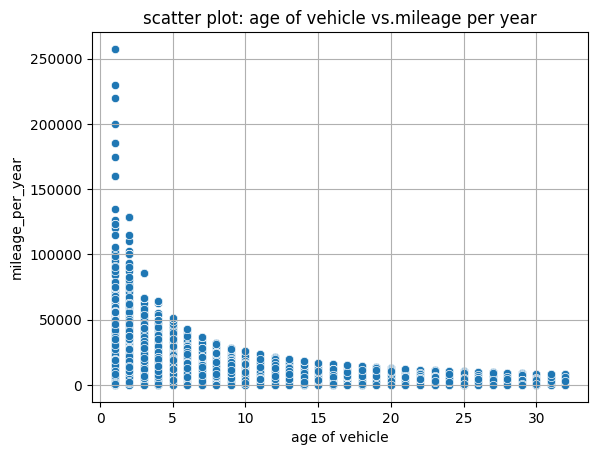

In [29]:
#Is there a correlation between 'age_of_vehicle' and 'mileage_per_year'?
correlation = capped_df['age_of_vehicle'].corr(capped_df['millage_per_year'])
print('correlation is:',correlation)
# creating a scatter plot
sns.scatterplot(data=capped_df,x = 'age_of_vehicle', y='millage_per_year')
plt.xlabel('age of vehicle')
plt.ylabel('mileage_per_year')
plt.title('scatter plot: age of vehicle vs.mileage per year')
plt.grid(True)
plt.show()

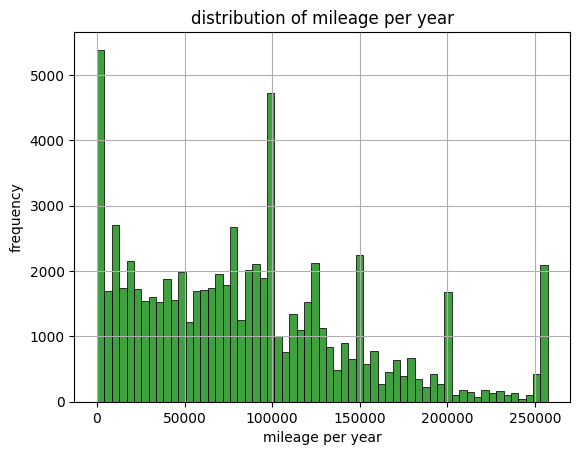

In [30]:
#What is the distribution of 'mileage_per_year'?
## creating histogram 
sns.histplot(data=capped_df ,x = 'mileage', color='green')
plt.xlabel('mileage per year')
plt.ylabel('frequency')
plt.title('distribution of mileage per year')
plt.grid(True)
plt.show()



In [33]:
## What percentage of vehicles are registered in the dataset?

total_count = len(capped_df)
print(total_count)



74979


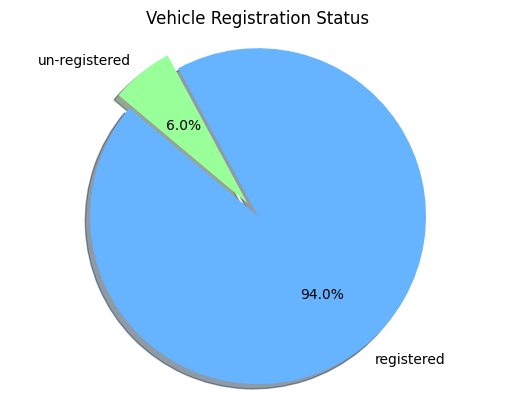

In [34]:
unregistered_count = (capped_df['registered'] =='Un-Registered').sum()
registered_count = total_count-unregistered_count

## creating percentage
un_registered_percentage = (unregistered_count /total_count ) *100
registered_percentage =  (registered_count /total_count ) *100

## create a pie chart
labels = ['registered','un-registered']
sizes = [registered_percentage,un_registered_percentage]
colors = ['#66b3ff', '#99ff99']
explode = (0.1,0)
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,
       startangle=140 )
plt.axis('equal')
plt.title('Vehicle Registration Status')
plt.show()

In [35]:
# How does the 'price' vary in different cities?
summary_statistics = capped_df.groupby('city')['price'].agg(['mean','median','count'])
print(summary_statistics)

                 mean     median  count
city                                   
Abbottabad 2620919.66 2090000.00    697
Abdul      2159000.00 2275000.00     20
Adda       2800000.00 2800000.00      1
Ahmed      2321777.78 1650000.00     45
Akora      2325000.00 2000000.00     31
...               ...        ...    ...
Wahn       5000000.00 5000000.00      1
Wazirabad  2749530.12 2295000.00     83
Yazman     2079000.00 1820000.00     10
Zafarwal   3087142.86 2725000.00     21
Zahir      3786000.00 3900000.00      5

[294 rows x 3 columns]


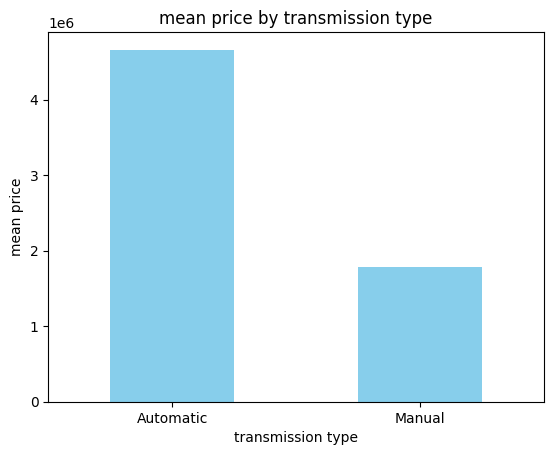

In [53]:
#How does the 'price' vary for different 'transmission' types?
mean_price_by_transmission = capped_df.groupby('transmission')['price'].mean()

# #plotting a bar-plot
mean_price_by_transmission.plot(kind='bar',color='skyblue')
plt.xlabel('transmission type')
plt.ylabel('mean price')
plt.title('mean price by transmission type')
plt. xticks(rotation = 0)
plt.show()


In [54]:
capped_df.describe()

,year,engine,mileage,price,age_of_vehicle,millage_per_year
count,74979.00,74979.00,74979.00,74979.00,74979.00,74979.00
mean,2012.88,1354.96,86256.43,3365836.39,10.12,11272.01
std,7.35,505.84,63951.34,2402228.61,7.35,8693.65
min,1991.00,100.00,1.00,110000.00,1.00,0.03
25%,2008.00,1000.00,34112.50,1480000.00,4.00,6000.00
50%,2015.00,1300.00,80000.00,2725000.00,8.00,10000.00
75%,2019.00,1600.00,123456.00,4550000.00,15.00,14907.55
max,2022.00,2500.00,257471.25,9155000.00,32.00,257471.25
